<a href="https://colab.research.google.com/github/MarioViniciusBC/Projeto-de-Aprendizado-de-Maquina-de-Ponta-a-Ponta/blob/main/Projeto_de_Aprendizado_de_M%C3%A1quina_de_Ponta_a_Ponta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Aprendizado de Máquina de Ponta a Ponta

### Projeto: Previsão de Preços Imobiliários na Califórnia

**Bem-vindo(a) à Machine Learning Housing Corporation!**

#### O Desafio
A sua primeira tarefa como Cientista de Dados da nossa empresa é construir um modelo de Machine Learning capaz de prever o valor médio de imóveis em qualquer distrito do estado da Califórnia.

#### Os Dados
Para treinar o seu modelo, você utilizará um conjunto de dados baseado no censo da Califórnia de 1990. Este *dataset* contém métricas essenciais de várias regiões, tais como:
* População local.
* Renda média dos habitantes (*median income*).
* Idade média dos imóveis.
* Localização geográfica (latitude e longitude).
* Proximidade com o oceano.

> **Atenção:** Os dados não representam casas individuais, mas sim "grupos de bairros" (*block groups*), que são a menor unidade geográfica do censo dos EUA, abrigando geralmente de 600 a 3.000 pessoas. Ao longo do projeto, chamaremos essas unidades simplesmente de "bairros" ou "distritos".

#### Objetivo de Negócio
A previsão gerada pelo seu modelo não será o produto final. Ela será enviada para um **sistema *downstream*** (um outro algoritmo na esteira da empresa), juntamente com outros sinais. Esse sistema final decidirá se **vale a pena ou não investir** na compra de imóveis em uma determinada área.

#### O Problema Atual
Atualmente, os preços dos imóveis são estimados manualmente por uma equipe de especialistas. Esse processo é caro, demorado e impreciso: quando conseguem descobrir o preço real mais tarde, percebem que as estimativas manuais frequentemente erram em mais de 10%. A meta do seu modelo é automatizar esse processo e reduzir essa margem de erro.

#### Enquadramento e Avaliação
* **Tipo de Tarefa:** Aprendizado Supervisionado (temos o "gabarito" dos preços nos dados de treino).
* **Categoria:** Regressão Multivariada (prever um valor numérico utilizando múltiplas variáveis).
* **Estratégia:** Aprendizado em Lote (*Batch Learning*).
* **Métrica de Sucesso:** O desempenho do modelo será avaliado pela **RMSE** (Raiz do Erro Quadrático Médio), que mede a média dos erros em dólares e pune severamente previsões muito discrepantes da realidade.

In [3]:
import pandas as pd

housing = pd.read_csv('/content/housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Projeto: Preços do Setor Imobiliário na Califórnia

> Usaremos o conjunto de dados do repositório StatLib referente a preços do setor imobiliário na Califórnia.

#### Sobre o Conjunto de Dados
* **Origem:** Repositório StatLib.
* **Base de dados:** Construída a partir do censo de 1990 na Califórnia.
* **Contexto Histórico:** Não são dados recentes.

#### Adaptações para o Aprendizado
Apesar de serem dados antigos, eles possuem excelentes qualidades para o ensino de *Machine Learning*. Por isso, assumimos a premissa de tratá-los como recentes. Para fins didáticos, o autor realizou as seguintes modificações no *dataset* original:
1. **Inclusão:** Adição de um atributo categórico extra.
2. **Remoção:** Exclusão de algumas características (*features*) menos relevantes.

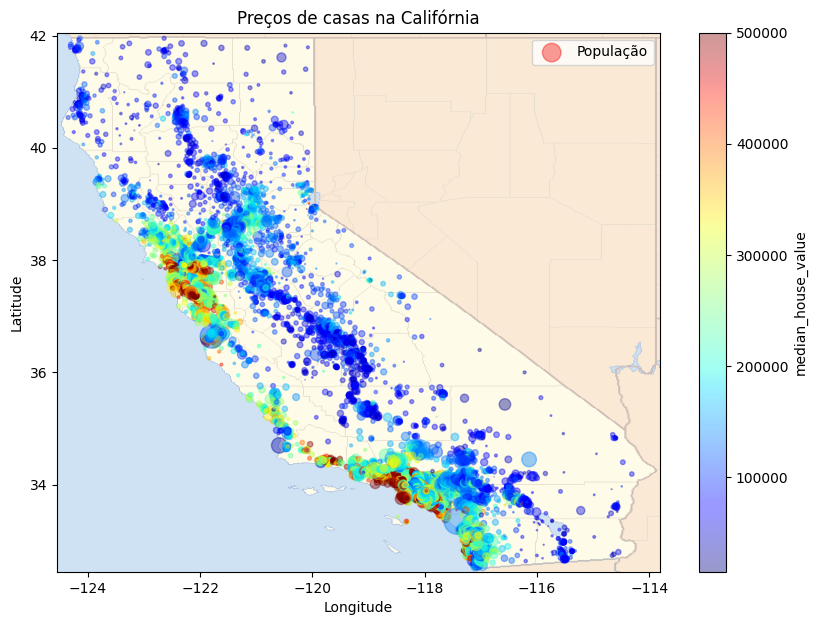

In [4]:
import urllib.request
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# 1. Baixar a imagem do mapa da Califórnia do repositório do livro
url_mapa = "https://raw.githubusercontent.com/ageron/handson-ml3/main/images/end_to_end_project/california.png"
urllib.request.urlretrieve(url_mapa, "california.png")

# 2. Carregar a imagem baixada
california_img = mpimg.imread("california.png")

# 3. Criar o gráfico de dispersão (seus dados)
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="População",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=True, alpha=0.4)

# 4. Sobrepor a imagem do mapa ao fundo
# O parâmetro 'extent' alinha a imagem perfeitamente com as coordenadas geográficas [x_min, x_max, y_min, y_max]
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# 5. Ajustes finais de exibição
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Preços de casas na Califórnia")
plt.legend()
plt.show()

#### Análise Visual: Preços do Setor Imobiliário na Califórnia

Este gráfico de dispersão geográfico fornece uma excelente intuição visual sobre como as diferentes características dos dados se relacionam com o valor final dos imóveis.

#### Como interpretar o gráfico
* **Eixos (X e Y):** A Longitude e a Latitude desenham o mapa do estado da Califórnia. Cada círculo no gráfico representa um distrito.
* **Tamanho dos círculos:** Representa a **população** daquele distrito. Círculos maiores indicam áreas mais densamente povoadas.
* **Cores (Mapa de Calor):** Representa o **valor médio da casa** (`median_house_value`). Pontos azuis indicam valores mais baixos, enquanto pontos amarelos, laranjas e vermelhos indicam os valores mais altos (chegando ao teto de $500.000).

#### Principais Insights
1. **A regra de ouro do mercado imobiliário ("Localização"):** Fica visualmente claro que os preços das casas estão fortemente ligados à localização. As áreas em vermelho e laranja (casas mais caras) estão estritamente concentradas na faixa litorânea.
2. **Grandes Polos:** É possível identificar rapidamente dois grandes aglomerados de preços altíssimos e grande densidade populacional:
    * A área da Baía de São Francisco (mais ao norte, ao redor da latitude 38).
    * A região metropolitana de Los Angeles e San Diego (mais ao sul, ao redor da latitude 34).
3. **Interior vs. Litoral:** À medida que nos afastamos do oceano Pacífico (movendo para o interior do estado no gráfico), a coloração passa a ser predominantemente azul, indicando imóveis significativamente mais baratos, independentemente do tamanho da população local.

**Conclusão da Etapa:** Uma rápida análise visual nos indica que a **proximidade com o oceano** e a **densidade populacional** serão *features* (variáveis) com grande peso quando formos treinar nosso modelo de Machine Learning.

#### O Segredo dos Dados: O "Grupo de Bairros" (A parte técnica)

O governo americano (*US Census Bureau*) não divulga dados de casas individuais (por questões de privacidade e volume de dados). Em vez disso, eles pegam um aglomerado de quarteirões onde vivem cerca de 600 a 3.000 pessoas e tiram a média de tudo ali dentro. Eles chamam esse pedaço de terra de block group (grupo de bairros) que chamaremos de "bairro" (ou *district*, no original em inglês).

Isso significa que cada linha da tabela do Pandas não representa uma casa, mas sim um bairro inteiro! É por isso que as colunas da tabela trazem médias e totais daquela região, por exemplo:

* **median_income**: A renda média das pessoas daquele bairro.

* **housing_median_age**: A idade média das casas daquele bairro.

* **total_rooms**: A soma de todos os quartos de todas as casas daquele bairro.

### 🎯 Etapa 1: Enquadramento do Problema

Antes de escrever qualquer código ou treinar modelos, é crucial entender o contexto de negócio e a arquitetura do sistema que vamos construir.

#### 💼 O Objetivo de Negócio
* **O Propósito do Modelo:** A previsão do preço médio dos imóveis não é o produto final. Ela será enviada para um **sistema *downstream*** (um outro sistema na esteira de produção) que decidirá se vale a pena ou não investir em determinadas regiões. A precisão do modelo afeta diretamente a receita da empresa.
* **O Problema Atual:** Hoje, as estimativas são feitas manualmente por especialistas. É um processo caro, demorado e impreciso (os erros frequentemente ultrapassam 10% do valor real). A meta é automatizar e baratear esse processo utilizando dados do censo.

#### 🤖 Arquitetura do Sistema de Machine Learning
Com o cenário mapeado, podemos definir que nosso projeto possui as seguintes características técnicas:
* **Aprendizado Supervisionado:** Os dados históricos de treinamento já possuem o resultado esperado (estão "rotulados" com os preços médios reais dos bairros).
* **Regressão Multivariada:** Nosso objetivo é prever um valor numérico contínuo (o preço da casa) baseando-se em múltiplas variáveis de entrada simultaneamente (como população, renda média, etc.).
* **Aprendizado em Lote (*Batch Learning*):** O conjunto de dados é estático e pequeno o suficiente para caber na memória. Como não há um fluxo de dados em tempo real exigindo que o modelo se adapte a cada segundo, o treinamento tradicional em lote é a abordagem ideal.

### Etapa 2: Seleção da Medida de Desempenho

Após enquadrar o problema como uma tarefa de regressão, precisamos escolher uma métrica para avaliar o quão bem o nosso modelo de *Machine Learning* está realizando as previsões. Essa métrica de erro é chamada de **Medida de Desempenho** ou **Função de Custo**.

#### 1. Raiz do Erro Quadrático Médio (RMSE)
A medida típica de desempenho para problemas de regressão é a **RMSE** (*Root Mean Square Error*). Ela penaliza grandemente os erros maiores, o que a torna excelente para medir a quantidade geral de erro que o sistema comete nas previsões.

A fórmula matemática da RMSE é dada pela equação:

$$RMSE(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left(h(\mathbf{x}^{(i)}) - y^{(i)}\right)^2}$$

#### Entendendo a Notação Matemática:
* $m$: É o número total de instâncias (bairros) no conjunto de dados.
* $\mathbf{x}^{(i)}$: É um vetor contendo todas as características (longitude, latitude, renda, etc.) da *i-ésima* instância, excluindo o valor final que queremos prever.
* $y^{(i)}$: É o *rótulo* (label), ou seja, o **valor real desejado** (o preço verdadeiro da casa) para aquela instância.
* $\mathbf{X}$: É a matriz completa contendo todas as características de todas as instâncias do *dataset*.
* $h$: É a função de previsão do sistema (a *hipótese*). Ela recebe $\mathbf{x}^{(i)}$ e gera o valor previsto $\hat{y}^{(i)}$.

Ao conectar a teoria matemática com a prática no código, é fundamental entender como a Álgebra Linear representa as linhas e colunas da nossa tabela de dados (nosso DataFrame do Pandas).

#### O Vetor de Coluna: $\mathbf{x}^{(i)}$
Por convenção matemática, o vetor que carrega as características (*features*) de uma única instância — como as informações de um único bairro — é escrito "em pé". Ele é chamado de **vetor coluna**.

Matematicamente, a $i$-ésima instância se parece com isto:

$$\mathbf{x}^{(i)} = \begin{pmatrix} \text{longitude} \\ \text{latitude} \\ \text{quartos} \\ \vdots \end{pmatrix}$$

##### A Transposição: $(\mathbf{x}^{(i)})^T$
No nosso DataFrame do Pandas, cada bairro ocupa uma **linha** horizontal, e não uma coluna vertical. Para que a matemática se alinhe com a nossa tabela real, aplicamos uma operação chamada **transposição**, representada pela letra $T$.

A expressão $(\mathbf{x}^{(i)})^T$ pega o vetor que estava "em pé" e o "deita", transformando-o em um **vetor linha**:

$$(\mathbf{x}^{(i)})^T = \begin{pmatrix} \text{longitude} & \text{latitude} & \text{quartos} & \dots \end{pmatrix}$$

#### A Matriz de Características: $\mathbf{X}$
Para formar a matriz $\mathbf{X}$ que representa todo o nosso *dataset* (excluindo os rótulos de preço), o autor simplesmente empilha todos esses vetores de linha recém-deitados uns sobre os outros. O resultado é a exata estrutura da tabela que vemos no código:

$$\mathbf{X} = \begin{pmatrix} (\mathbf{x}^{(1)})^T \\ (\mathbf{x}^{(2)})^T \\ \vdots \\ (\mathbf{x}^{(m)})^T \end{pmatrix}$$

#### Entendendo o RMSE na Prática

O **RMSE** (*Root Mean Square Error* ou Raiz do Erro Quadrático Médio) é simplesmente uma forma de responder à pergunta: *"Em média, por quantos dólares o nosso modelo está errando o preço das casas?"*

O cálculo funciona na seguinte ordem:

1. **O Erro:** Primeiro, o sistema calcula a diferença entre o preço que ele previu e o preço real da casa.
2. **O Quadrado:** Para tirar os sinais negativos e evitar que um erro anule o outro, elevamos todos os erros ao quadrado. O grande "pulo do gato" de elevar ao quadrado é que isso pune erros grandes de forma muito mais severa.
3. **A Média:** Agora, somamos essas punições todas e dividimos pelo total de casas para descobrir qual é a "média da punição" que o modelo está sofrendo.
4. **A Raiz:** Por fim, aplicamos a raiz quadrada no valor final apenas para "desfazer" a bizarrice da unidade (trazendo o valor de volta para a unidade original de dinheiro).


### 2. Erro Médio Absoluto (MAE)
Embora a RMSE seja o padrão, ela é muito sensível a *outliers* (valores atípicos e extremos). Se o nosso conjunto de dados de bairros possuir muitos valores atípicos, pode ser mais adequado utilizar o **MAE** (*Mean Absolute Error*), também conhecido como Desvio Médio Absoluto.

A fórmula do MAE é:

$$MAE(\mathbf{X}, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(\mathbf{x}^{(i)}) - y^{(i)} \right|$$

#### Normas de Distância
Matematicamente, tanto a RMSE quanto o MAE medem a distância entre o vetor das nossas previsões e o vetor dos valores reais.
* A **RMSE** corresponde à **norma $\ell_2$** (Norma Euclidiana), que é a distância tradicional em linha reta.
* O **MAE** corresponde à **norma $\ell_1$** (Norma Manhattan), que mede a distância como se estivéssemos andando por blocos ortogonais em uma cidade.

**Conclusão:** Como em uma curva normal de dados os *outliers* são raros, começaremos o projeto utilizando a **RMSE** como nossa principal medida de avaliação.

### Etapa 3 - Análise de dados

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Inspecionando a Estrutura dos Dados com `.head()`

Ao executar o método `housing.head()`, conseguimos visualizar as 5 primeiras linhas do nosso conjunto de dados. Essa etapa é fundamental para conhecermos a "cara" das informações que alimentarão o nosso modelo.

**O que cada linha representa?**
É crucial lembrar que, neste projeto, uma linha **não equivale a uma única casa**, mas sim a um **bairro inteiro** (ou grupo de quarteirões).

**Os 10 Atributos (Colunas)**
O conjunto de dados possui exatamente 10 características para cada bairro. Para facilitar o nosso entendimento de negócio, podemos agrupá-las em 4 categorias lógicas:

* **Localização:**
  * `longitude` e `latitude`: As coordenadas geográficas do bairro.
  * `ocean_proximity`: A que distância o bairro está do mar (este é o único atributo de texto/categórico da tabela).
* **Demografia e Economia:**
  * `population`: O número total de pessoas morando no bairro.
  * `households`: O número total de residências (ou grupos familiares).
  * `median_income`: A renda média daquela vizinhança.
* **Estrutura dos Imóveis:**
  * `housing_median_age`: A idade média das construções.
  * `total_rooms`: O somatório de todos os cômodos de todas as casas daquele bairro.
  * `total_bedrooms`: O somatório de todos os quartos de dormir do bairro.
* **O Rótulo (Nosso Alvo):**
  * `median_house_value`: O valor médio das casas. É exatamente essa coluna que o nosso algoritmo terá que aprender a prever no futuro!

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 📊 Inspecionando a Estrutura e os Dados Ausentes

Após a primeira espiada nas linhas iniciais, o próximo passo fundamental é usar o método `.info()`. Ele nos fornece um panorama técnico e rápido do conjunto de dados, revelando a **quantidade de instâncias**, os **tipos das variáveis** e, o mais importante, se há **"buracos" (dados faltando)** na nossa tabela.

**1. O Diagnóstico do `.info()`**
* **Tamanho do Dataset:** Descobrimos que temos **20.640 instâncias** (linhas/bairros).
* **O Alerta de Dados Ausentes:** Ao analisar a coluna `total_bedrooms` (total de quartos), notamos que ela possui apenas **20.433 valores não nulos**. Isso significa que **207 bairros estão com essa informação em branco**. *Algoritmos de Machine Learning geralmente não funcionam com dados ausentes, então precisaremos tratar esse problema na etapa de pré-processamento!*
* **Tipos de Dados:** Quase todos os 10 atributos são puramente numéricos, com apenas uma exceção: a coluna `ocean_proximity`, que é lida como tipo `object` (texto).

In [7]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


**2. Explorando Atributos Categóricos com `.value_counts()`**
Como a coluna `ocean_proximity` contém textos que se repetem (como "INLAND" ou "NEAR OCEAN"), ela é classificada como um **atributo categórico**. Para entender como nossos dados estão distribuídos nessas categorias, utilizamos o comando:

`housing["ocean_proximity"].value_counts()`

Esse método é excelente porque conta exatamente quantos bairros pertencem a cada categoria de proximidade com o mar, nos ajudando a entender o perfil geográfico do nosso *dataset* antes mesmo de plotar qualquer mapa.

* **<1H OCEAN**: 9136 (Significa que 9.136 bairros ficam a menos de 1 hora do oceano)

* **INLAND**: 6551 (Significa que 6.551 bairros ficam no interior do estado)

* **NEAR OCEAN**: 2658 (2.658 bairros ficam perto do oceano)

* **NEAR BAY**: 2290 (2.290 bairros ficam perto da Baía de São Francisco)

* **ISLAND**: 5 (Apenas 5 bairros ficam em ilhas)

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Raio-X Estatístico: Desvendando o `.describe()`

O comando `housing.describe()` funciona como uma radiografia instantânea das nossas variáveis numéricas. Em vez de olharmos para milhares de linhas individualmente, este método nos entrega um mapa matemático do comportamento dos nossos dados.

Aqui está o que cada linha dessa tabela realmente significa na prática:

* **`count` (Volume de Dados):** Mostra quantos registros válidos existem por coluna. É aqui que confirmamos matematicamente o alerta anterior: enquanto a maioria das colunas possui 20.640 registros, a `total_bedrooms` parou em 20.433. Os valores nulos foram ignorados na contagem, evidenciando a falha que precisaremos corrigir.
* **`mean` e `std` (Centro e Dispersão):** A linha `mean` indica a média aritmética simples. No entanto, a média sozinha pode enganar. É por isso que temos o `std` (Desvio Padrão), que nos conta o quanto os valores "fogem" dessa média. Um desvio padrão alto indica que os dados daquela coluna variam drasticamente de um bairro para outro.
* **`min` e `max` (Os Extremos):** Apresentam o piso e o teto absolutos de cada categoria. Observando a renda média (`median_income`), por exemplo, vemos que ela vai de aproximadamente 0.5 (mínimo) até 15.0 (máximo).
* **`25%`, `50%` e `75%` (A Fila dos Percentis):** Imagine organizar todos os bairros em uma fila indiana, do menor valor para o maior.
    * **25% (1º Quartil):** É o valor que marca o fim do primeiro quarto da fila.
    * **50% (Mediana):** É o bairro que está exatamente na metade da fila. Ele divide a amostra no meio: 50% dos bairros estão abaixo desse valor, e 50% estão acima. Muitas vezes é uma métrica mais confiável que a própria média, pois não se deixa levar por valores absurdamente altos ou baixos.
    * **75% (3º Quartil):** É o ponto que deixa 3/4 da fila para trás.

**Insight:**
Dê uma olhada atenta na linha `max`. Note como a idade máxima das casas (`housing_median_age`) está perfeitamente cravada em **52.0**, e o valor máximo das propriedades (`median_house_value`) bate no teto de **500001.0**. Isso é um forte indício de que o sistema que coletou os dados no passado aplicou um limite artificial aos números, arredondando qualquer valor superior para baixo.

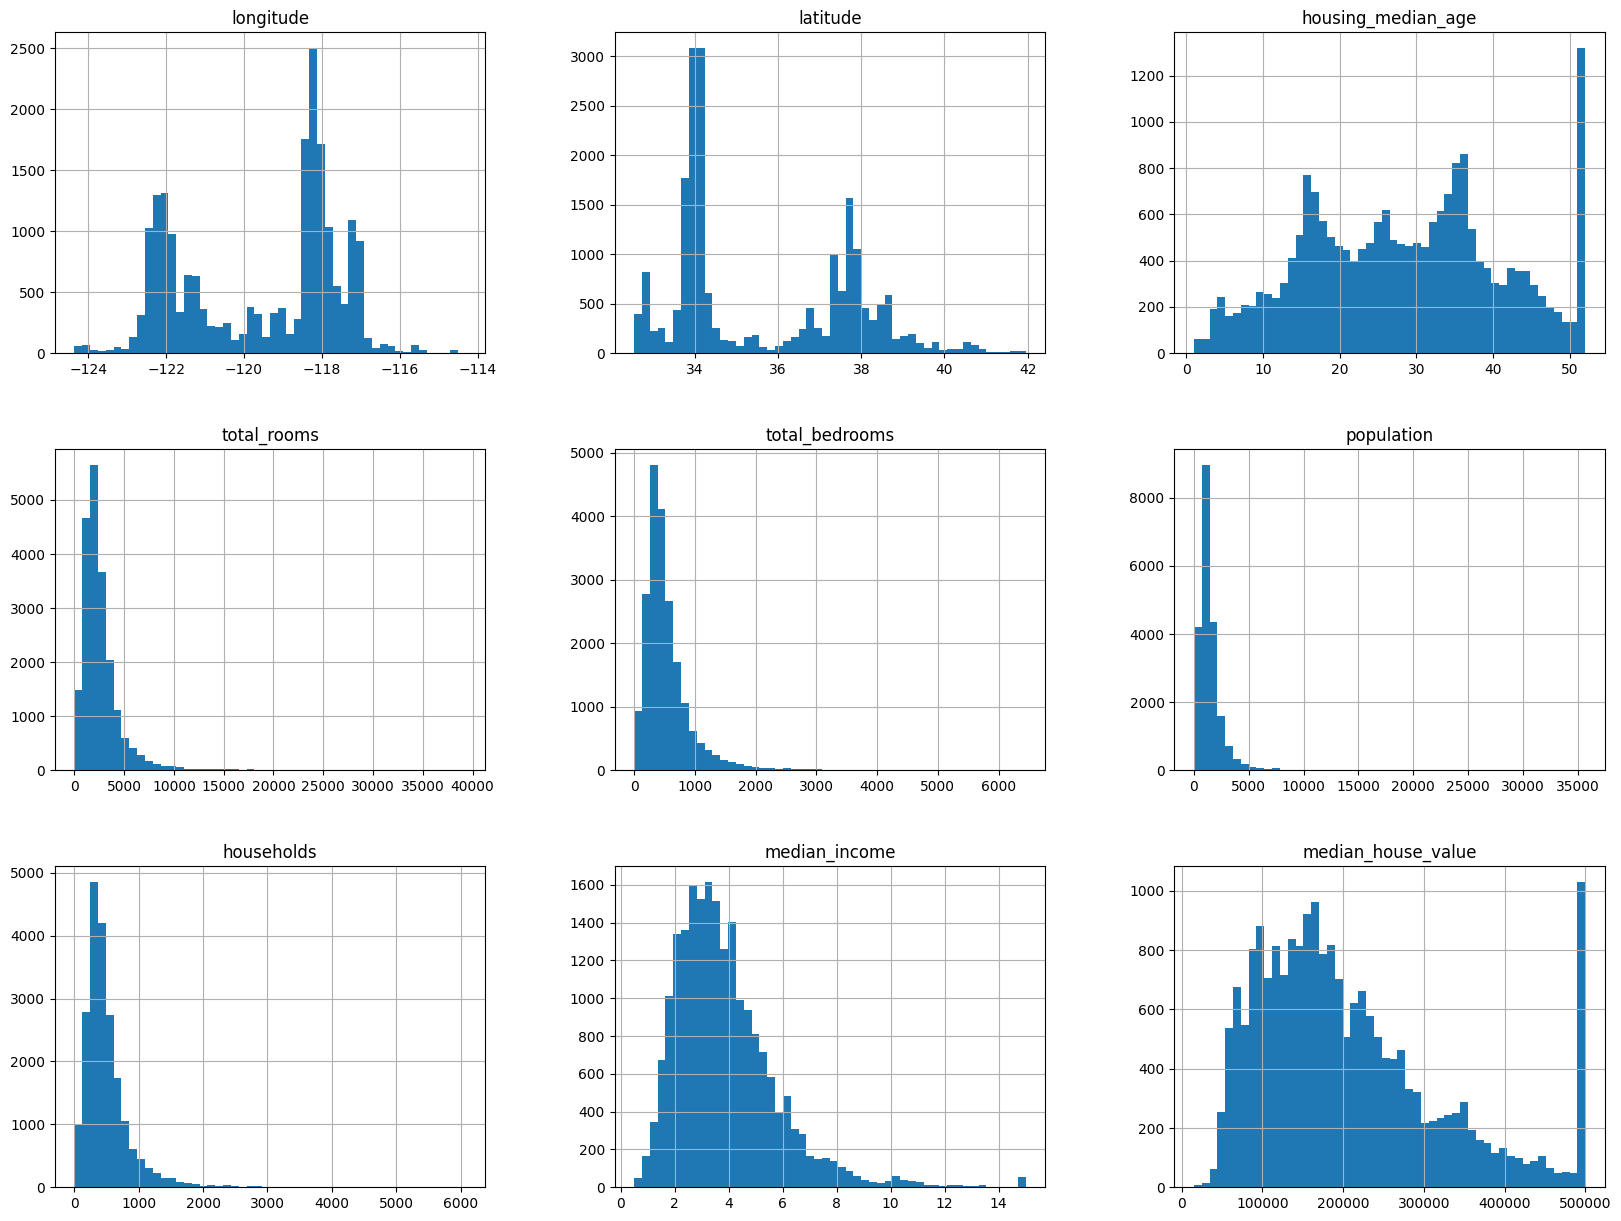

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 🕵️‍♂️ Principais Insights dos Histogramas

A visualização dos histogramas revela peculiaridades críticas sobre os nossos dados que afetarão diretamente o treinamento do modelo de Machine Learning. O autor destaca 4 pontos de atenção:

**1. A Renda Média não está em Dólares (Escalonamento)**
Se olharmos o gráfico `median_income`, o eixo X vai apenas de 0.5 a 15. Obviamente, ninguém ganha apenas 15 dólares por ano. Esses dados foram pré-processados: eles estão escalonados (provavelmente representando dezenas de milhares de dólares, onde 3 significa US$ 30.000) e foram limitados artificialmente com um teto de 15.0 e um piso de 0.5.

**2. O Perigo dos "Tetos Artificiais" (Valores Limitados)**
Repare no último gráfico à direita, `median_house_value`. Existe uma "torre" gigante no final (exatamente nos US$ 500.000). O mesmo acontece na idade das casas (`housing_median_age`) aos 52 anos. Isso significa que os dados foram "tampados": qualquer casa mais cara que 500 mil foi registrada como 500 mil.
* *Por que isso é um problema?* Porque o valor da casa é exatamente o que queremos prever (nosso alvo)! Se deixarmos isso assim, o algoritmo vai aprender incorretamente que os preços das casas *nunca* passam desse valor.
* *A Solução:* Precisaremos remover esses distritos limitados dos dados mais tarde, para que o modelo não aprenda esse teto falso.

**3. A Guerra das Escalas**
Os atributos estão em escalas completamente diferentes. A renda vai de 0 a 15, enquanto a população vai de 0 a mais de 35.000. A grande maioria dos algoritmos de Machine Learning não lida bem com isso (eles tendem a dar mais importância para os números maiores). Precisaremos aplicar uma técnica chamada *Feature Scaling* (Escalonamento de Características) para colocar todos na mesma régua.

**4. Caudas Longas (Assimetria à Direita)**
Muitos histogramas (como `total_rooms`, `total_bedrooms` e `population`) não têm o formato de um sino centralizado (distribuição normal). Eles possuem uma grande concentração à esquerda e uma "cauda" longa que se estende para a direita. Isso dificulta o aprendizado dos algoritmos. No futuro, aplicaremos transformações matemáticas (como logaritmos) para tentar deixá-los mais parecidos com uma curva de sino.